In [23]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
from datetime import datetime
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [62]:

cmpnyLs = [
    "TOSYY",
    "INTC",
    "TXN",
    "SHCAY",
    "HTHIY",
    "FJTSY",
    "AMD",
    "STM",
    "IBM"
]
DF = pd.DataFrame()
latest = pd.DataFrame()
dateDF = pd.DataFrame()
for company in cmpnyLs:
    dateDF["Earnings Date"] = yf.Ticker(company).earnings_history["Earnings Date"]
    print(company)
    for i in range(len(dateDF)):
        datum = dateDF["Earnings Date"][i]
        try:
            dateLs = datum.split(",")
            dateDF["Earnings Date"][i] = datetime.strptime(f'{dateLs[0]},{dateLs[1]}', "%b %d, %Y").date()
        except:
            continue
    DF["Earnings Date"] = dateDF["Earnings Date"].copy()
    DF[f'EPS {company}'] = yf.Ticker(company).earnings_history["Reported EPS"].copy() #pulls earnings per share into dataframe

del DF["EPS SHCAY"]
del DF["EPS FJTSY"]
del DF["EPS TOSYY"]



TOSYY
INTC
TXN
SHCAY
HTHIY
FJTSY
AMD
STM
IBM


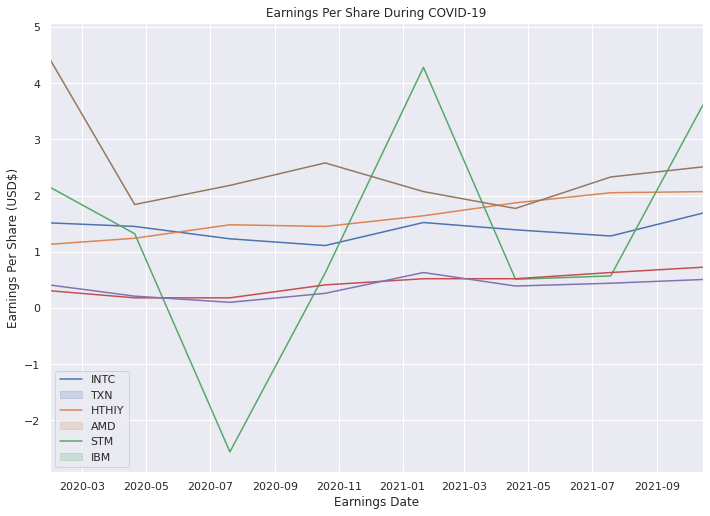

In [65]:
DFpre = DF.loc[DF["Earnings Date"]>date(2020,1,1)]
DFpre = DFpre.loc[DF["Earnings Date"]<date(2022,1,1)]
dt = pd.DataFrame()
dt["Earnings Date"] = DFpre["Earnings Date"].copy()
colu = list(DFpre)
colu = colu[1:]
ax, fig = plt.subplots(1,1)
for comp in colu:
    ax = sns.lineplot(data = DFpre, x ="Earnings Date", y=comp, legend= "auto")

for i in range(len(colu)):
    colu[i] = colu[i].split(" ")[-1]
ax.legend(colu);
ax.set_ylabel("Earnings Per Share (USD$)")
ax.set_title("Earnings Per Share During COVID-19")

ax.set_xlim(date(2020,1,30), date(2021,10,15))


ax.get_figure().savefig("EPSpost19.png")


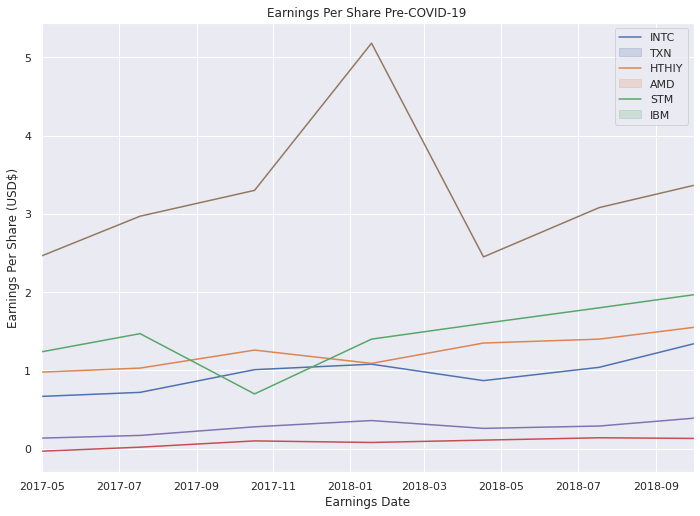

In [61]:
colu = list(DFpre)
colu = colu[1:]
ax, fig = plt.subplots(1,1)
for comp in colu:
    ax = sns.lineplot(data = DFpre, x ="Earnings Date", y=comp, legend= "auto")

for i in range(len(colu)):
    colu[i] = colu[i].split(" ")[-1]
ax.legend(colu);
ax.set_ylabel("Earnings Per Share (USD$)")
ax.set_title("Earnings Per Share Pre-COVID-19")

ax.set_xlim(date(2017,4,30), date(2018,10,1))


ax.get_figure().savefig("EPSpre19.png")



In [7]:
quote = yf.download(tickers= "TOSYY", interval= "1d", period="5y").copy()
quote["day_time"] = quote.index
quote["day_time"] = pd.to_datetime(quote["day_time"], format="%Y-%m-%d")
quote = quote.loc[quote["day_time"] > "2018"]
quote = quote.loc[quote["day_time"] < "2019"]
value = quote["Close"][0]
dfClose[f"{company} Stock Value Change (%)"] = (quote["Close"]/value - 1)*100


[*********************100%***********************]  1 of 1 completed


NameError: name 'dfClose' is not defined

In [109]:
cmpnyLs = [
    "TOSYY",
    "INTC",
    "005930.KS",
    "TXN",
    "SHCAY",
    "HTHIY",
    "FJTSY",
    "AMD",
    "STM",
    "IBM"
]
dfClose = pd.DataFrame()
for company in cmpnyLs:
    quote = yf.download(tickers= company, interval= "1d", period="5y").copy()
    quote["day_time"] = quote.index
    quote["day_time"] = pd.to_datetime(quote["day_time"], format="%Y-%m-%d")
    quote = quote.loc[quote["day_time"] > "2018"]
    quote = quote.loc[quote["day_time"] < "2019"]
    value = quote["Close"][0]
    dfClose[f"{company} Stock Value Change (%)"] = (quote["Close"]/value - 1)*100







[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [92]:
dfClose.head()

,day_time,TOSYY Stock Value Change (%),INTC Stock Value Change (%),005930.KS Stock Value Change (%),TXN Stock Value Change (%),SHCAY Stock Value Change (%),HTHIY Stock Value Change (%),FJTSY Stock Value Change (%),AMD Stock Value Change (%),STM Stock Value Change (%),IBM Stock Value Change (%)
Date,,,,,,,,,,,
2018-01-02 00:00:00-05:00,2018-01-02 00:00:00-05:00,-6.843270,17.831993,NaN,12.034380,6.875002,3.221561,-10.142028,-23.001407,11.442782,5.053462
2018-01-03 00:00:00-05:00,2018-01-03 00:00:00-05:00,-5.408394,13.832999,NaN,15.069507,9.000003,4.996706,-9.867918,-19.004208,14.179106,7.941160
2018-01-04 00:00:00-05:00,2018-01-04 00:00:00-05:00,-2.704197,11.745478,NaN,14.920935,7.500005,4.852064,-5.307743,-15.007015,16.467659,10.127361
2018-01-05 00:00:00-05:00,2018-01-05 00:00:00-05:00,-2.704197,12.525160,NaN,15.801760,7.875001,5.115055,-6.503855,-16.690043,16.119402,10.665391
2018-01-08 00:00:00-05:00,2018-01-08 00:00:00-05:00,-2.980137,12.525160,NaN,16.353598,8.500004,5.667321,-6.653369,-13.884996,15.323382,11.332831


In [53]:

#dfClosePost = dfClosePost[dfClose["day_time"] > "2020"]

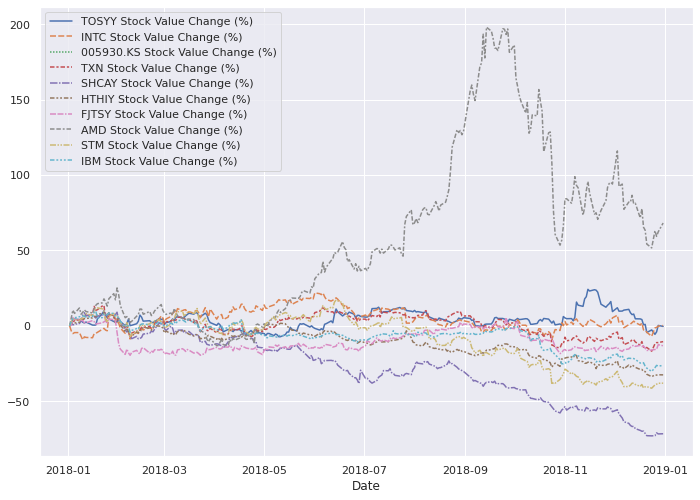

In [110]:
fig = sns.lineplot(data = dfClose);

